<a href="https://colab.research.google.com/github/jordanfalcao/data-analytics/blob/main/Primeiros%20passos/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [59]:
print(sns.__version__)

0.11.1


In [3]:
 import pandas as pd

# pd.read_csv para ler um arquivo no formato csv
 notas = pd.read_csv("ratings.csv")
 notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
# trocando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
#acessando apenas a coluna 'nota'
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
# método .unique() acessa todos os possíveis valores
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
#value_counts() conta quantos valores há de cada índice da coluna nota
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
# mean() mostra a média, median() mostra a mediana
print("Media:", notas['nota'].mean())
print("Mediana:", notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


In [11]:
# outra notação para pegar a coluna nota (head = cabeçalho)
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

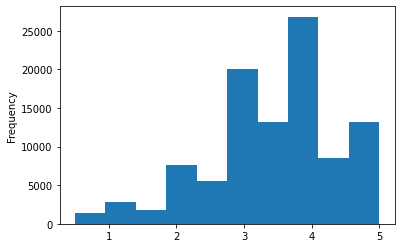

In [12]:
# plot da coluna nota do tipo 'histograma'
notas.nota.plot(kind = "hist")

In [13]:
# .describe() apresenta diversos atributos da coluna
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


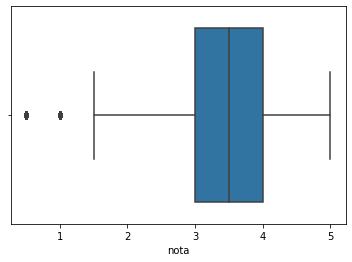

In [14]:
import seaborn as sns

# boxplot da biblioteca seaborn mostra diversos dados visuais, como mediana, quartis: 25%, 75%
sns.boxplot(notas.nota)

# Olhando os filmes

In [15]:
# lendo novo arquivo .csv
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [16]:
# buscando filmeId ==1, no caso, Toy Story. 
notas.query("filmeId == 1").nota.mean()    #média das notas do filmeId == 1

3.9209302325581397

In [17]:
notas.query("filmeId == 3").nota.mean()

3.2596153846153846

In [18]:
# Agrupando notas pelo filmeID
medias_por_filme = notas.groupby("filmeId").nota.mean()  # apresenta a média de cada filme (agrupamos pelo filmeId)
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

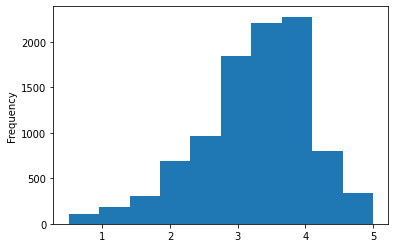

In [19]:
medias_por_filme.plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


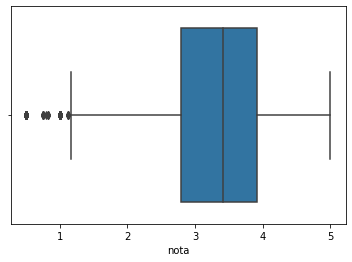

In [20]:
sns.boxplot(medias_por_filme)

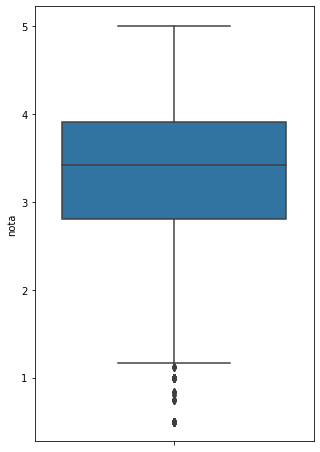

In [21]:
# bloxplot na horizontal, y 
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 8)) #alterando tamanho da figura
sns.boxplot(y = medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


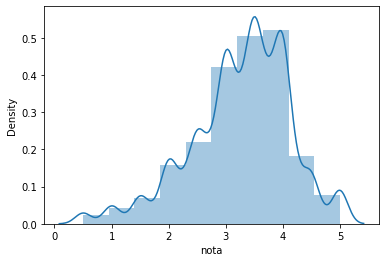

In [23]:
# gráfico de distribuição do seaborn
sns.distplot(medias_por_filme, bins = 10)  # bins = quantas divisões

Text(0.5, 1.0, 'Histograma das médias dos filmes')

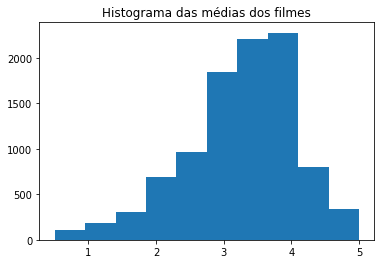

In [24]:
# importando biblioteca matplot.pyplot
# Pandas e seaborn usam a matplot.pyplot em baixo nível (fazem uso da biblioteca)
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [25]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
# valores únicos da coluna línguas
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# budget => orçamento => quantitativo contínuo
# quantidade de votos => 1, 2, 3, 4, não tem 2,5 votos

In [28]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [29]:
tmdb.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [40]:
 # apenas os índices da coluna (no caso, as línguas)
 tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'cs', 'ta', 'ro', 'ar', 'id', 'ky',
       'is', 'af', 'no', 'sl', 'hu', 'el', 'vi', 'ps', 'pl', 'tr', 'nb', 'te',
       'xx'],
      dtype='object')

In [41]:
# apenas os valores da coluna
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [117]:
# transforma a série em dataframe, depois remove o índice
# transformar para dataframe é importante pq antes só tinhamos um dado na coluna
# dataframe tem dois dados (neste caso, os nomes das línguas e o total contado)
tmdb['original_language'].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [45]:
 contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
 contagem_de_lingua.columns = ["original_language", "total"] #renomeia as colunas acima
 contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


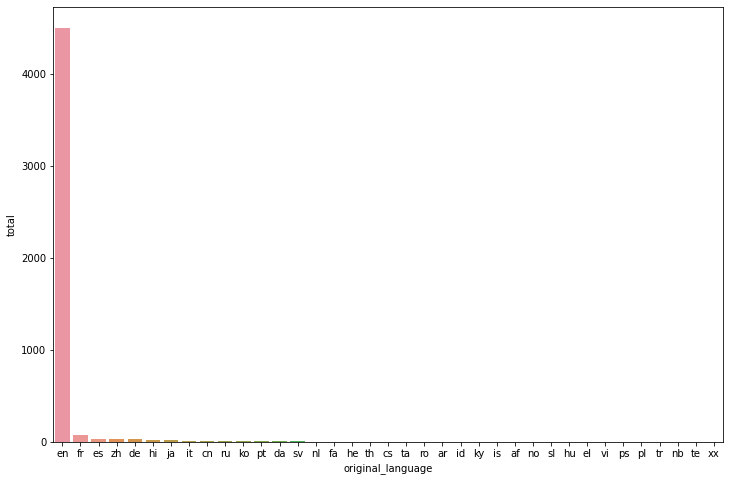

In [50]:
plt.figure(figsize=(12, 8)) #altera o tamanho do gráfico
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

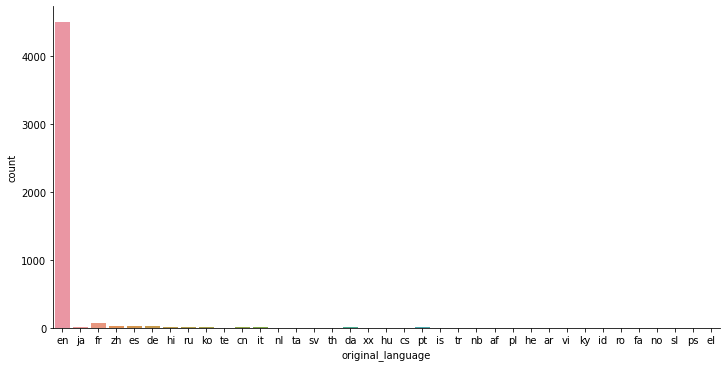

In [120]:
#catplot mais prático, não precisou usar value_counts, nem transformar a série em dataframe

sns.catplot(x = "original_language", kind="count", data = tmdb, aspect = 2)

([<matplotlib.patches.Wedge at 0x7fcaac274950>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

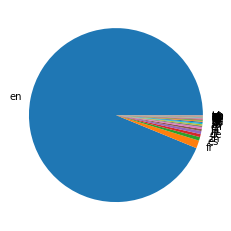

In [68]:
# geralmnete não usa-se o gráfico de pizza
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [72]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [77]:
#criando um objeto (dataframe)

dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


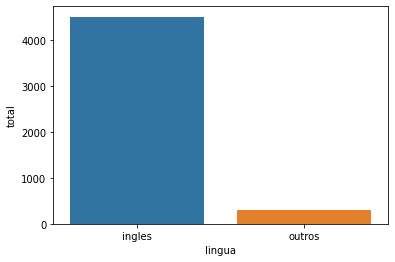

In [78]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7fcaac1b0d50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

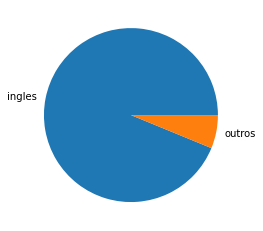

In [79]:
plt.pie(dados['total'], labels = dados['lingua'])

In [83]:
total_por_lingua_outros_filmes = tmdb.query("original_language !='en'").original_language.value_counts()
total_por_lingua_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
cs     2
ar     2
id     2
ta     2
ro     2
te     1
xx     1
tr     1
el     1
pl     1
ky     1
nb     1
ps     1
vi     1
sl     1
hu     1
no     1
is     1
af     1
Name: original_language, dtype: int64

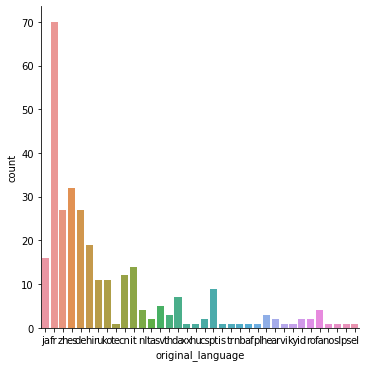

In [91]:
# para efeito de comparação com o gráfico editado
sns.catplot(x = "original_language", kind="count", data = tmdb.query("original_language !='en'"))

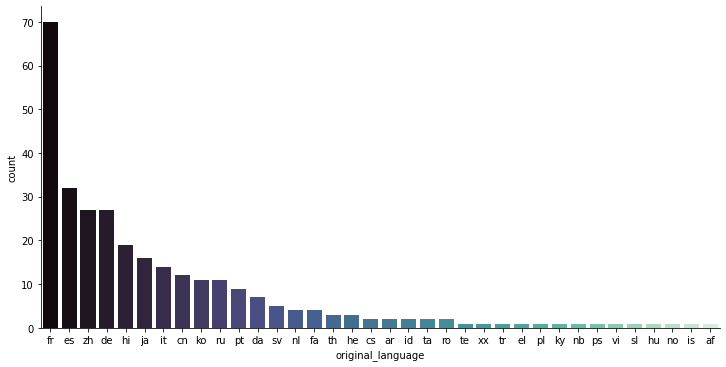

In [97]:
# plot apenas dos filmes sem lingua original em inglês
# modificando parâmetros do gráfico através da documentação da seaborn
# 'palette' para alterar as cores, 'order' para ordenar da maneira espeficicada
# aspect para dizer se é quadrado (1), retângulo (2)...
sns.catplot(x = "original_language", kind="count", data = tmdb.query("original_language !='en'"),
            aspect = 2,
            palette = "mako",
            order = total_por_lingua_outros_filmes.index)


In [122]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [124]:
notas_toy_story = notas.query('filmeId==1')
notas_jumanji = notas.query('filmeId==2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [109]:
# %.2f deixa em duas casas decimais
print("Nota média do Toy Story: %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [110]:
print("Nota média do Toy Story: %.2f" % notas_toy_story.nota.median())
print("Nota média do Jumanji: %.2f" % notas_jumanji.nota.median())

Nota média do Toy Story: 4.00
Nota média do Jumanji: 3.50


In [115]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [116]:
print(filme1.mean(), filme2.mean())

3.0 3.0
